In [ ]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

In [71]:
#import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


#read data in dataframe using pandas

d0 = pd.read_csv('./train.csv')

# read first 5 rows using head function

print(d0.head(5))

# save the labels into new variable l.

l = d0['label']

# Drop the feature label and stores all other data in new variable d

d = d0.drop("label", axis=1)




   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [72]:
# print d

print('-----------------------------------------------------------')
print(d.head(5))

#print l
print('-----------------------------------------------------------')
print(l.head(5))

-----------------------------------------------------------
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel

In [73]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


C:\Users\HP-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


0


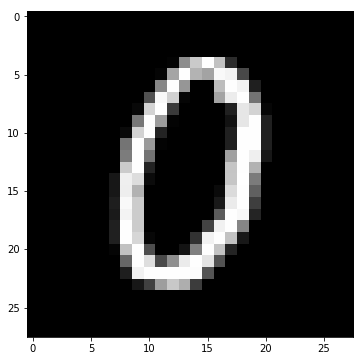

In [74]:
# Display a label as plot
plt.figure(figsize=(6,6))
idx = 5

# reshaping from 1D to 2D array
grid_data = d.iloc[idx].as_matrix().reshape(28,28)

#plot 
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show

print(l[idx])

In [75]:
labels = l.head(42000)
data = d.head(42000)


print(data.shape)

(42000, 784)


In [76]:
# data-preprocessing : standardizing the data 

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\HP-PC\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


C:\Users\HP-PC\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [77]:
print(standardized_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [78]:
# finding the co-variance matrix i.e.- A^T * A

sample_data = standardized_data

# matrix multiplication using numpy

covar_matrix = np.matmul(sample_data.T , sample_data)

print("shape of co-variance matrix = ", covar_matrix.shape)

shape of co-variance matrix =  (784, 784)


In [79]:
covar_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
#implementing PCA for Visualization #(2-D)
#using PCA from Scikit-learn

from sklearn import decomposition
pca = decomposition.PCA()

In [81]:
# parameter configration 
# we select number of components = 2

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# printing the shape of PCA should be in 2-D

print("shape after implementing PCA = " , pca_data.shape)

shape after implementing PCA =  (42000, 2)


In [82]:
# attaching the labels for the 2-D data
pca_data = np.vstack((pca_data.T, labels)).T
print(pca_data.shape)


(42000, 3)


C:\Users\HP-PC\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


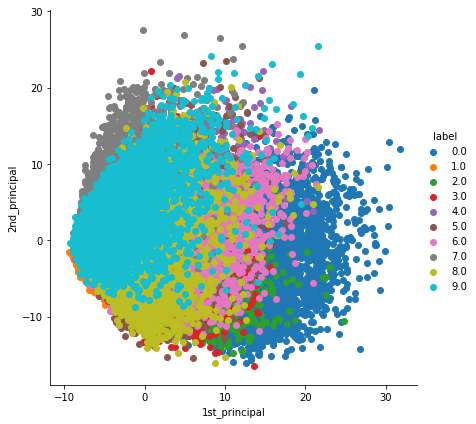

In [83]:
# creating a new data frame which helps us for plotting the result data
# ploting the 2d data points with seaborn

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [97]:
#PCA for dimensionality reduction and not for just visualization
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

#print the shape after PCA
print("shape of data after PCA = ", pca_data.shape)


shape of data after PCA =  (42000, 784)


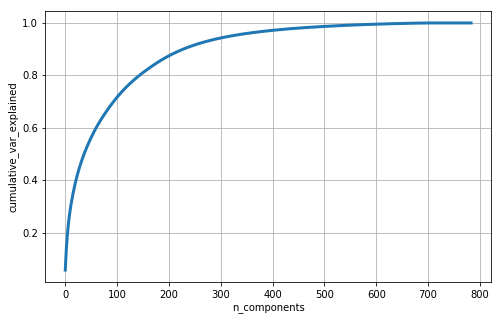

In [103]:
#plotting PCA

plt.figure(1, figsize=(8,5))

plt.clf()
plt.plot(cum_var_explained, linewidth=3)
plt.axis('tight')
plt.grid()
plt.xlabel("n_components")
plt.ylabel("cumulative_var_explained")
plt.show()

In [ ]:
# as we can see from the above graph that approx 90% of the data
# ranges from 0 - 200 dimensions. i.e. 200 - dimensions explain 90% of data.